# Problem 1 - Cutlets.mtw 

###      A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


     Minitab File : Cutlets.mtw
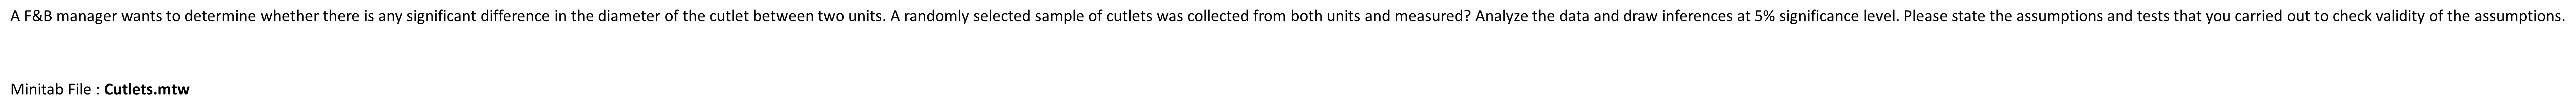 

In [1]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency,chisquare
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
cutlets=pd.read_csv('Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
# Data Analysis

In [4]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
cutlets.isna().sum()

Unit A    0
Unit B    0
dtype: int64

In [6]:
cutlets.duplicated().sum()

0

# Two sample T-test 

X-->  cutlets unit A 

Y --> cutlets unit B 

H0 -> X==Y

H1 -> X!=Y




In [7]:
X=cutlets['Unit A']
Y=cutlets['Unit B']

In [8]:
val=stats.ttest_ind( X,Y,alternative="two-sided")
val

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.47223947245995)

In [9]:
print("47.2% chances are there that H0 is true")

47.2% chances are there that H0 is true


#### Inferences from 2 Sample T-Test

T Statistic = 0.72

p-value = 0.472

#  Problem Statement 2

   A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

LabTat.mtw

H0 -> x1=x2=x3=x4

h1 -> x1!=x2!=x3!=x4

In [10]:
tat=pd.read_csv('LabTAT.csv')
tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [11]:
tat_value=stats.f_oneway(tat.iloc[:,0],tat.iloc[:,1],tat.iloc[:,2],tat.iloc[:,3])
tat_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [12]:
if tat_value[1]<0.05:
    print("H0 is rejected and there is difference of tat of all laboratories")
else:
    print("H0 is accepted and there is no difference of tat of all laboratories")

H0 is rejected and there is difference of tat of all laboratories


P value of the One way Anova test is == 2e-16 < α

# Problem Statement - 3

      Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
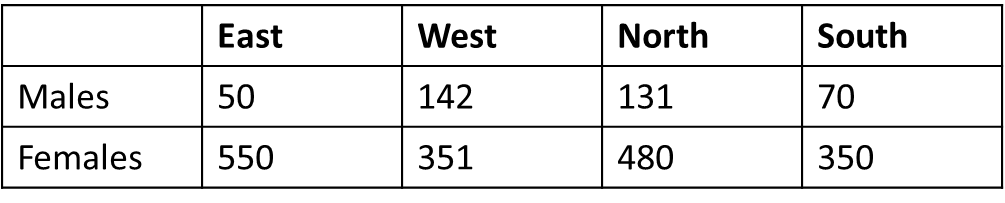



####  Buyer Ratio.mtw

H0 -> Male = Female

H1 -> Male != Female

alpha --> 0.05

p_value< alpha --> h0 rejected

In [13]:
buyerratio_df=pd.read_csv('BuyerRatio.csv')

In [14]:
buyerratio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [15]:
buyerratio_df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [16]:
obs=np.array([[50,142,131,70],[435,1523,1356,750]])

In [17]:
chi2_contingency(obs)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [18]:
p_value=chi2_contingency(obs)[1]
p_value

0.6603094907091882

In [19]:
if p_value<0.05:
    print("H0 is rejected and Male-Female buyer ratio is not similar")
else:
    print("H0 is accepted and  Male-Female buyer ratio is similar")

H0 is accepted and  Male-Female buyer ratio is similar


# Problem Statement - 4

## TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw


aplha ---> 0.05

H0 --> customer order forms defective % does not varies by centre

H1 --> customer order forms defective % does  varies by centre


In [20]:
cof=pd.read_csv('Costomer+OrderForm.csv')
cof

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [21]:
cof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [22]:
print("Value count of Phillippines")
print(cof['Phillippines'].value_counts())
print("-------------------------------")
print("Value count of Indonesia")
print(cof['Indonesia'].value_counts())
print("-------------------------------")
print("Value count of Malta")
print(cof['Malta'].value_counts())
print("-------------------------------")
print("Value count of India")
print(cof['India'].value_counts())
print("-------------------------------")

Value count of Phillippines
Error Free    271
Defective      29
Name: Phillippines, dtype: int64
-------------------------------
Value count of Indonesia
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
-------------------------------
Value count of Malta
Error Free    269
Defective      31
Name: Malta, dtype: int64
-------------------------------
Value count of India
Error Free    280
Defective      20
Name: India, dtype: int64
-------------------------------


In [23]:
obs_cof=np.array([[271,267,269,280],[29,33,31,20]])
obs_cof

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [24]:
chi2_contingency(obs_cof)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [25]:
p_value_cof=chi2_contingency(obs_cof)[1]
p_value_cof

0.2771020991233135

In [26]:
p_value_cof<0.05

False

In [27]:
if p_value_cof<0.05:
    print("h0 is rejected")
else:
    print("customer order forms defective % does not varies by centre - h0 is accepted")
    

customer order forms defective % does not varies by centre - h0 is accepted
